
--- Before Cleaning ---
Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999912 entries, 0 to 999911
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   goodreads_book_id  999912 non-null  int64
 1   tag_id             999912 non-null  int64
 2   count              999912 non-null  int64
dtypes: int64(3)
memory usage: 22.9 MB
None

Numeric Summary:
       goodreads_book_id         tag_id          count
count       9.999120e+05  999912.000000  999912.000000
mean        5.263442e+06   16324.527073     208.869633
std         7.574057e+06    9647.846196    3501.265173
min         1.000000e+00       0.000000      -1.000000
25%         4.622700e+04    8067.000000       7.000000
50%         3.948410e+05   15808.000000      15.000000
75%         9.378297e+06   24997.000000      40.000000
max         3.328864e+07   34251.000000  596234.000000

Categorical Summary:
No categorical columns present.


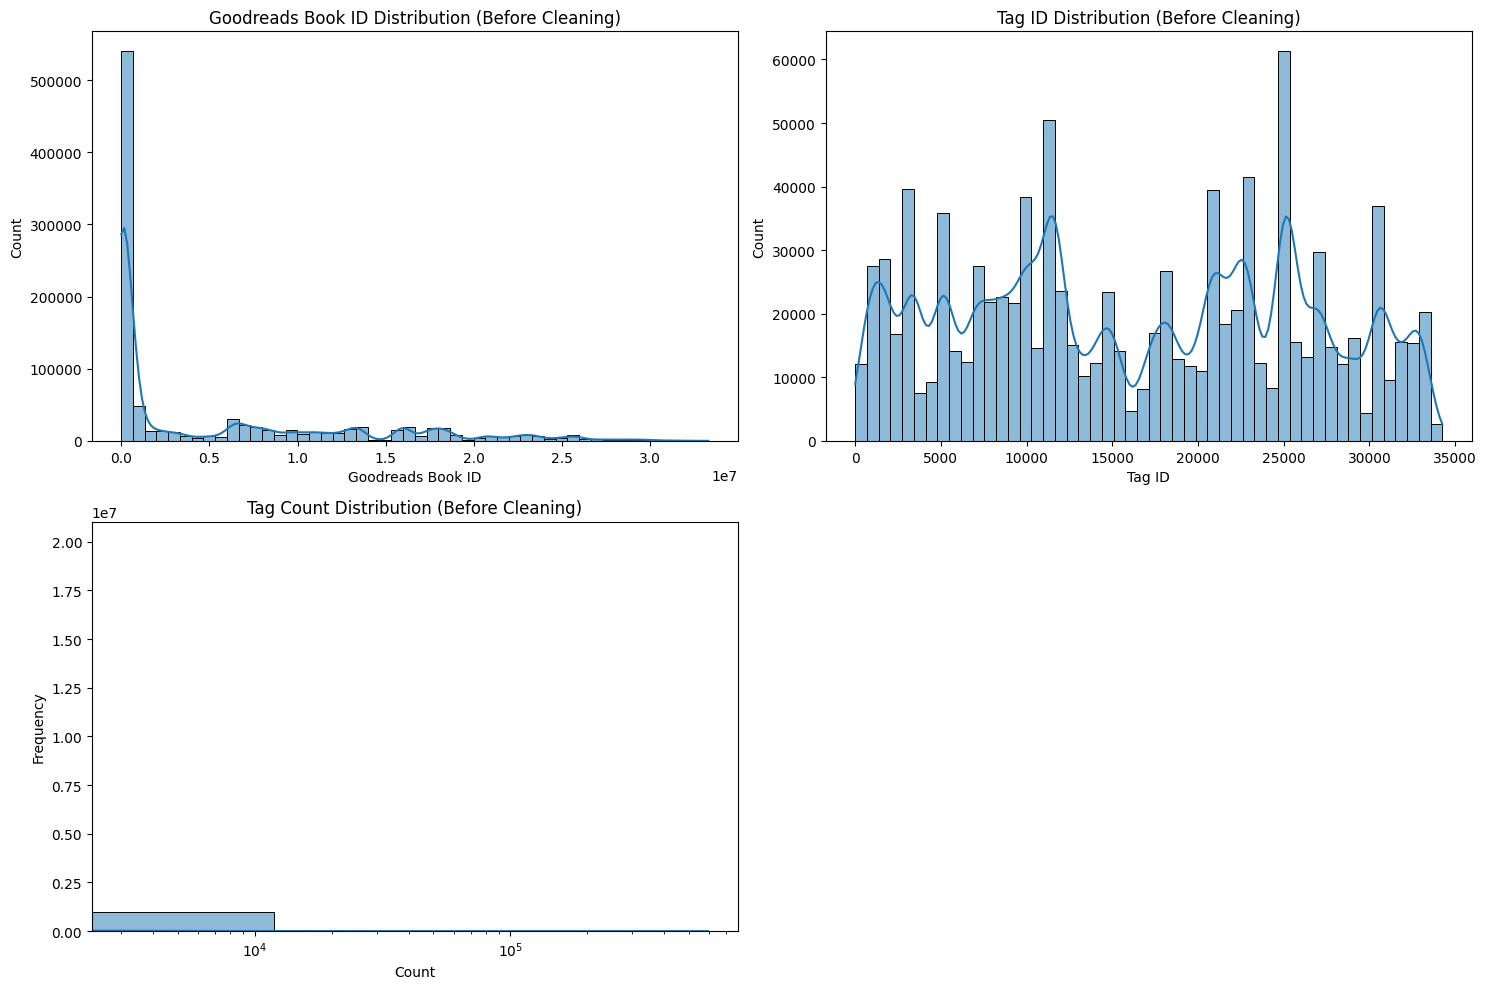


Additional Checks:
Missing values per column:
goodreads_book_id    0
tag_id               0
count                0
dtype: int64
Duplicate rows: 6
Duplicate book-tag pairs: 8
Unique books: 10000
Unique tags: 34252
Average tags per book: 99.9912
Average count per tag: 208.86963252766245
Books.csv unique book_ids: 10000
Overlap with books.csv book_ids: 10000


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
book_tags = pd.read_csv(r"C:/Users/HP/OneDrive\Desktop\BookMatchML\data\book_tags.csv")

# Function to analyze data
def analyze_data(df, stage="Before Cleaning"):
    print(f"\n--- {stage} ---")
    print("Data Info:")
    print(df.info())
    print("\nNumeric Summary:")
    print(df.describe())
    print("\nCategorical Summary:")
    if any(df.dtypes == 'object'):
        print(df.describe(include='object'))
    else:
        print("No categorical columns present.")

    # Plots for numeric columns
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 2, 1)
    sns.histplot(df['goodreads_book_id'].dropna(), bins=50, kde=True)
    plt.title(f'Goodreads Book ID Distribution ({stage})')
    plt.xlabel('Goodreads Book ID')
    plt.ylabel('Count')
    
    plt.subplot(2, 2, 2)
    sns.histplot(df['tag_id'].dropna(), bins=50, kde=True)
    plt.title(f'Tag ID Distribution ({stage})')
    plt.xlabel('Tag ID')
    plt.ylabel('Count')
    
    plt.subplot(2, 2, 3)
    sns.histplot(df['count'].dropna(), bins=50, kde=True)
    plt.title(f'Tag Count Distribution ({stage})')
    plt.xlabel('Count')
    plt.ylabel('Frequency')
    plt.xscale('log')  # Log scale due to likely skewness
    
    plt.tight_layout()
    plt.show()

# Before Cleaning Analysis
analyze_data(book_tags, "Before Cleaning")

# Additional Checks
print("\nAdditional Checks:")
print("Missing values per column:")
print(book_tags.isnull().sum())
print("Duplicate rows:", book_tags.duplicated().sum())
print("Duplicate book-tag pairs:", book_tags.duplicated(subset=['goodreads_book_id', 'tag_id']).sum())
print("Unique books:", book_tags['goodreads_book_id'].nunique())
print("Unique tags:", book_tags['tag_id'].nunique())
print("Average tags per book:", book_tags.groupby('goodreads_book_id')['tag_id'].count().mean())
print("Average count per tag:", book_tags['count'].mean())

# Load books.csv for comparison
books = pd.read_csv(r"C:/Users/HP/OneDrive\Desktop\BookMatchML\data\books_cleaned_final.csv")
print("Books.csv unique book_ids:", books['book_id'].nunique())
print("Overlap with books.csv book_ids:", len(set(book_tags['goodreads_book_id']).intersection(set(books['book_id']))))


--- Before Cleaning ---
Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999912 entries, 0 to 999911
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   goodreads_book_id  999912 non-null  int64
 1   tag_id             999912 non-null  int64
 2   count              999912 non-null  int64
dtypes: int64(3)
memory usage: 22.9 MB
None

Numeric Summary:
       goodreads_book_id         tag_id          count
count       9.999120e+05  999912.000000  999912.000000
mean        5.263442e+06   16324.527073     208.869633
std         7.574057e+06    9647.846196    3501.265173
min         1.000000e+00       0.000000      -1.000000
25%         4.622700e+04    8067.000000       7.000000
50%         3.948410e+05   15808.000000      15.000000
75%         9.378297e+06   24997.000000      40.000000
max         3.328864e+07   34251.000000  596234.000000

Categorical Summary:
No categorical columns present.


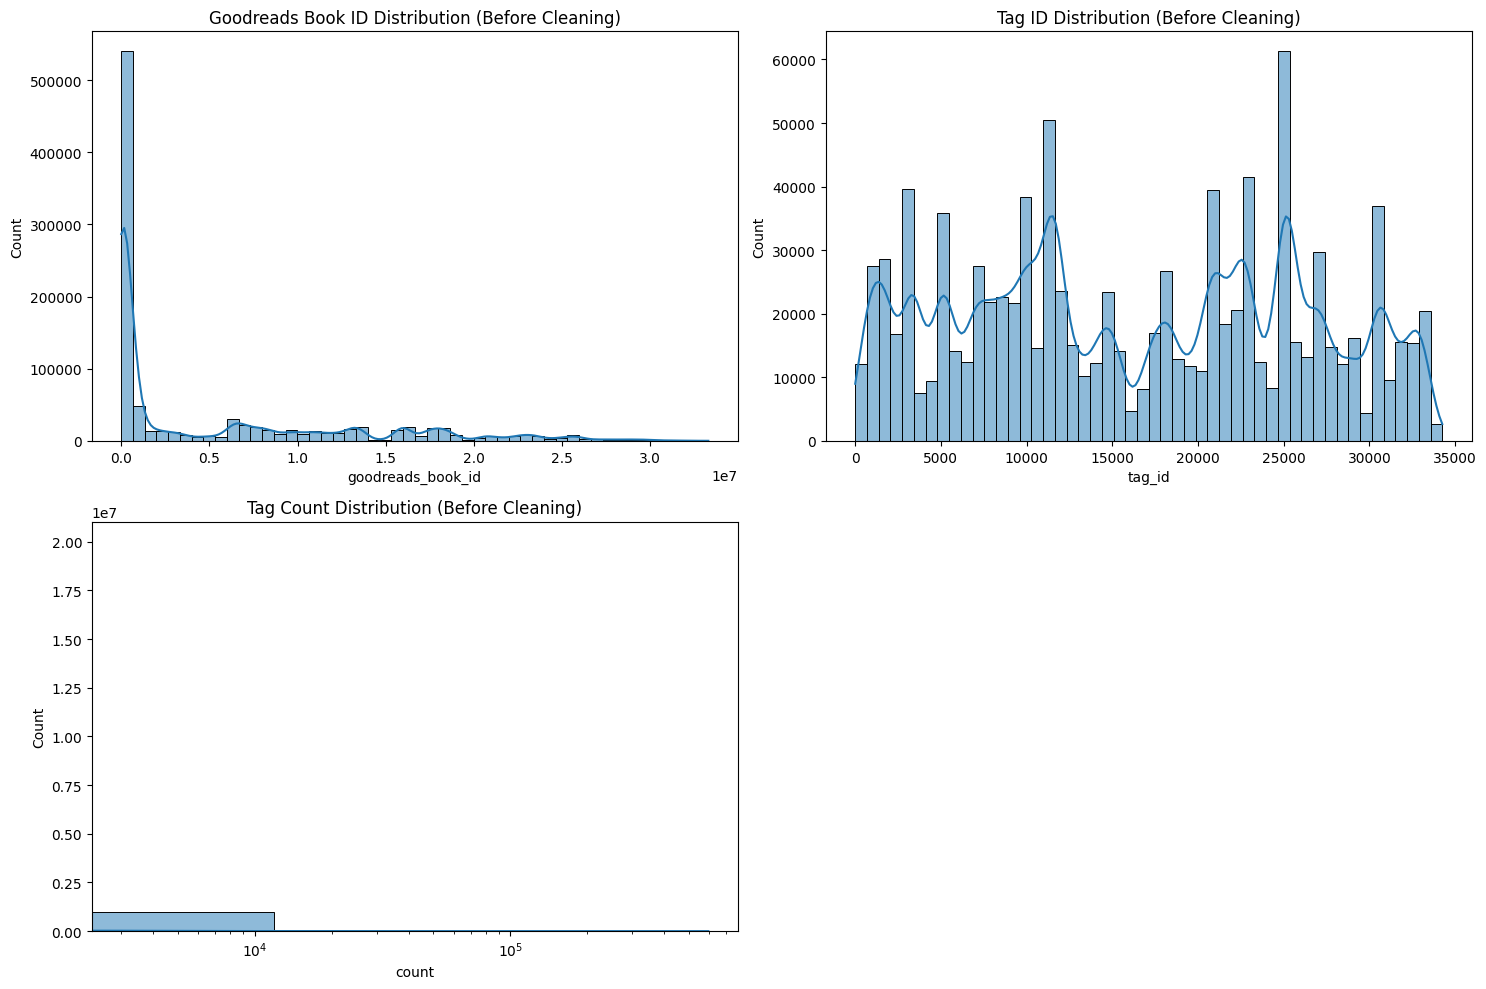


Additional Checks (Before):
Missing values per column:
goodreads_book_id    0
tag_id               0
count                0
dtype: int64
Duplicate rows: 6
Duplicate book-tag pairs: 8
Unique books: 10000
Unique tags: 34252
Found 16 duplicate book-tag pairs.
Duplicates aggregated by summing counts.
Found 6 rows with negative counts.
Negative counts replaced with 0.
All goodreads_book_ids match books.csv.

--- After Cleaning ---
Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999904 entries, 0 to 999903
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   goodreads_book_id  999904 non-null  int64
 1   tag_id             999904 non-null  int64
 2   count              999904 non-null  int64
dtypes: int64(3)
memory usage: 22.9 MB
None

Numeric Summary:
       goodreads_book_id         tag_id          count
count       9.999040e+05  999904.000000  999904.000000
mean        5.263484e+06   16324.529846  

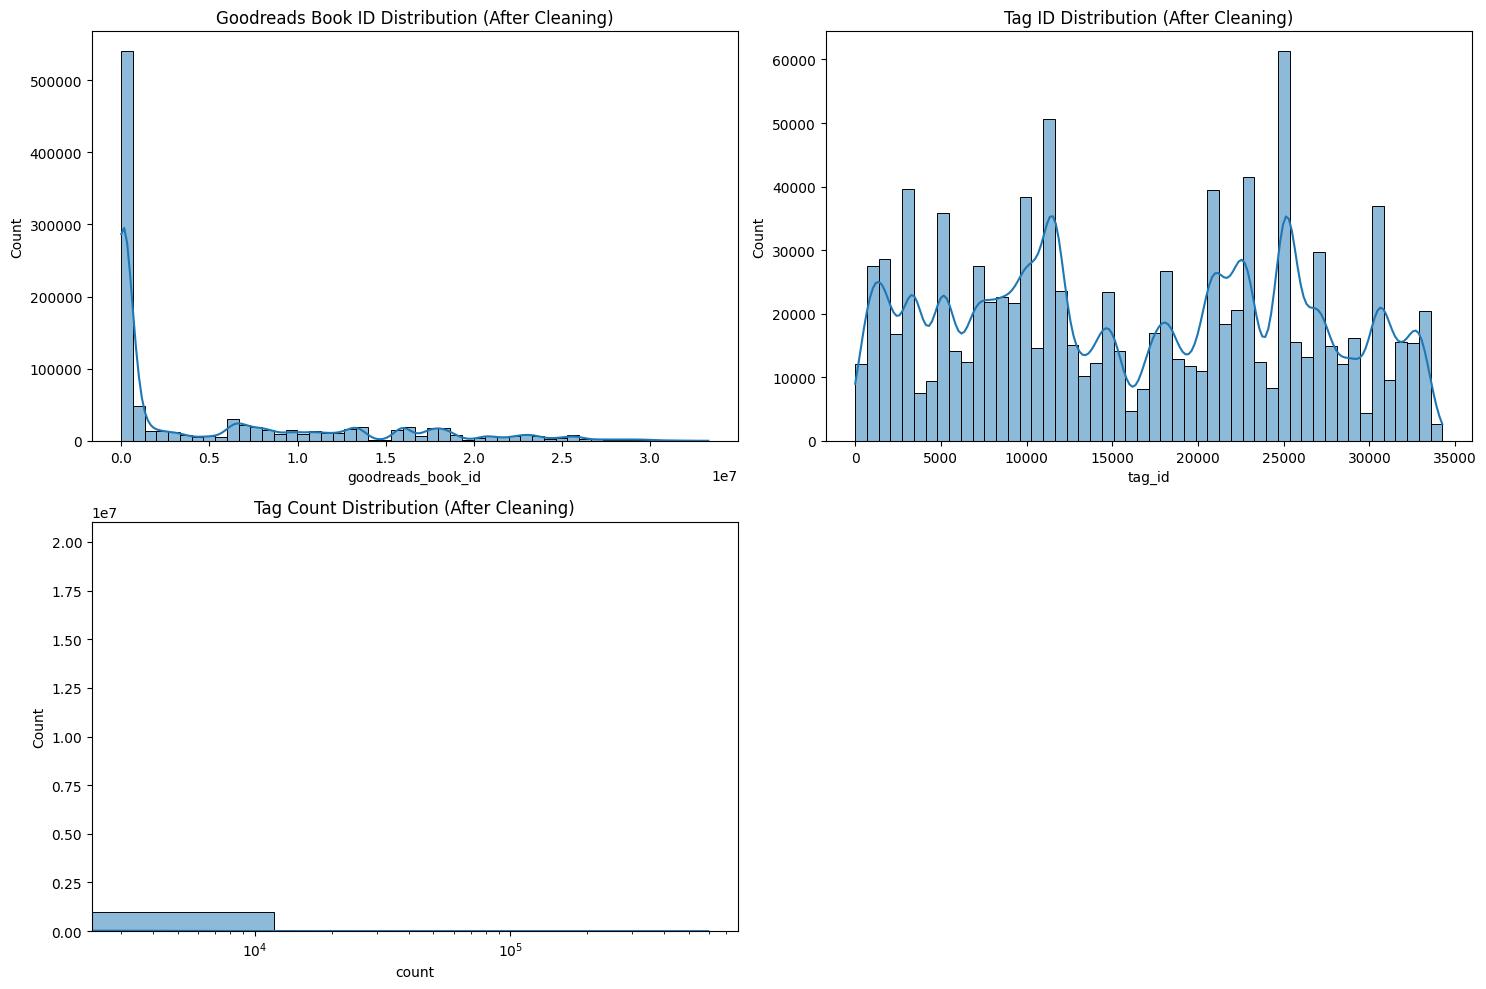


Final Validation:
Missing values: 0
Duplicate book-tag pairs: 0
Unique books: 10000
Unique tags: 34252
Rows remaining: 999904
Average tags per book: 99.9904
Cleaned data saved to 'book_tags_cleaned.csv'


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
book_tags = pd.read_csv(r"C:/Users/HP/OneDrive\Desktop\BookMatchML\data\book_tags.csv")
books = pd.read_csv(r"C:/Users/HP/OneDrive\Desktop\BookMatchML\data\books_cleaned_final.csv")

# Function to analyze data
def analyze_data(df, stage="Before Cleaning"):
    print(f"\n--- {stage} ---")
    print("Data Info:")
    print(df.info())
    print("\nNumeric Summary:")
    print(df.describe())
    print("\nCategorical Summary:")
    if any(df.dtypes == 'object'):
        print(df.describe(include='object'))
    else:
        print("No categorical columns present.")

    # Plots
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 2, 1)
    sns.histplot(df['goodreads_book_id'].dropna(), bins=50, kde=True)
    plt.title(f'Goodreads Book ID Distribution ({stage})')
    plt.subplot(2, 2, 2)
    sns.histplot(df['tag_id'].dropna(), bins=50, kde=True)
    plt.title(f'Tag ID Distribution ({stage})')
    plt.subplot(2, 2, 3)
    sns.histplot(df['count'].dropna(), bins=50, kde=True)
    plt.title(f'Tag Count Distribution ({stage})')
    plt.xscale('log')
    plt.tight_layout()
    plt.show()

# Before Cleaning Analysis
analyze_data(book_tags, "Before Cleaning")

# Additional Checks
print("\nAdditional Checks (Before):")
print("Missing values per column:")
print(book_tags.isnull().sum())
print("Duplicate rows:", book_tags.duplicated().sum())
print("Duplicate book-tag pairs:", book_tags.duplicated(subset=['goodreads_book_id', 'tag_id']).sum())
print("Unique books:", book_tags['goodreads_book_id'].nunique())
print("Unique tags:", book_tags['tag_id'].nunique())

# Preprocessing
book_tags_cleaned = book_tags.copy()

# 1. Handle duplicates
duplicate_pairs = book_tags_cleaned.duplicated(subset=['goodreads_book_id', 'tag_id'], keep=False)
if duplicate_pairs.sum() > 0:
    print(f"Found {duplicate_pairs.sum()} duplicate book-tag pairs.")
    # Sum counts for duplicate pairs
    book_tags_cleaned = book_tags_cleaned.groupby(['goodreads_book_id', 'tag_id'], as_index=False).agg({'count': 'sum'})
    print("Duplicates aggregated by summing counts.")
# Remove exact duplicates (if any remain)
book_tags_cleaned = book_tags_cleaned.drop_duplicates()

# 2. Fix negative counts
invalid_counts = book_tags_cleaned['count'] < 0
if invalid_counts.sum() > 0:
    print(f"Found {invalid_counts.sum()} rows with negative counts.")
    # Replace negative counts with 0
    book_tags_cleaned.loc[invalid_counts, 'count'] = 0
    print("Negative counts replaced with 0.")

# 3. Validate goodreads_book_id against books.csv
valid_book_ids = set(books['book_id'])
invalid_book_ids = book_tags_cleaned[~book_tags_cleaned['goodreads_book_id'].isin(valid_book_ids)]['goodreads_book_id'].unique()
if len(invalid_book_ids) > 0:
    print(f"Found {len(invalid_book_ids)} invalid goodreads_book_ids:", sorted(invalid_book_ids)[:10])
    book_tags_cleaned = book_tags_cleaned[book_tags_cleaned['goodreads_book_id'].isin(valid_book_ids)]
    print("Removed tags with invalid goodreads_book_ids.")
else:
    print("All goodreads_book_ids match books.csv.")

# After Cleaning Analysis
analyze_data(book_tags_cleaned, "After Cleaning")

# Final Validation
print("\nFinal Validation:")
print("Missing values:", book_tags_cleaned.isnull().sum().sum())
print("Duplicate book-tag pairs:", book_tags_cleaned.duplicated(subset=['goodreads_book_id', 'tag_id']).sum())
print("Unique books:", book_tags_cleaned['goodreads_book_id'].nunique())
print("Unique tags:", book_tags_cleaned['tag_id'].nunique())
print("Rows remaining:", len(book_tags_cleaned))
print("Average tags per book:", book_tags_cleaned.groupby('goodreads_book_id')['tag_id'].count().mean())

# Save cleaned data
book_tags_cleaned.to_csv(r"C:/Users/HP/OneDrive\Desktop\BookMatchML\data\book_tags_cleaned.csv", index=False)
print("Cleaned data saved to 'book_tags_cleaned.csv'")


--- Before Cleaning ---
Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999912 entries, 0 to 999911
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   goodreads_book_id  999912 non-null  int64
 1   tag_id             999912 non-null  int64
 2   count              999912 non-null  int64
dtypes: int64(3)
memory usage: 22.9 MB
None

Numeric Summary:
       goodreads_book_id         tag_id          count
count       9.999120e+05  999912.000000  999912.000000
mean        5.263442e+06   16324.527073     208.869633
std         7.574057e+06    9647.846196    3501.265173
min         1.000000e+00       0.000000      -1.000000
25%         4.622700e+04    8067.000000       7.000000
50%         3.948410e+05   15808.000000      15.000000
75%         9.378297e+06   24997.000000      40.000000
max         3.328864e+07   34251.000000  596234.000000

Categorical Summary:
No categorical columns present.


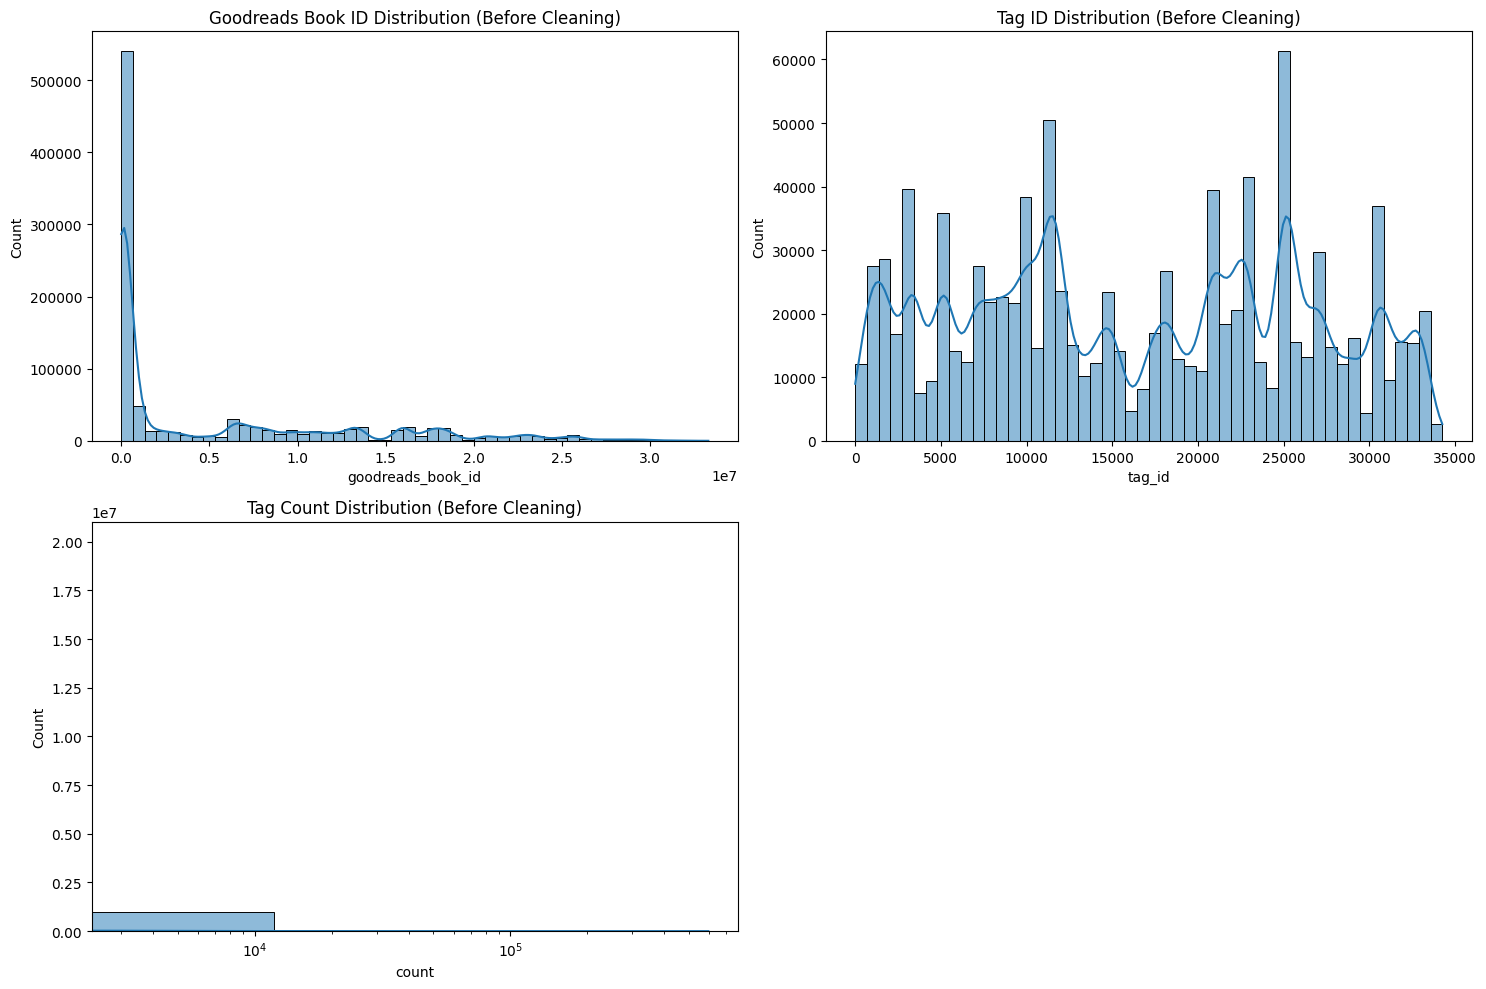


Additional Checks (Before):
Missing values per column:
goodreads_book_id    0
tag_id               0
count                0
dtype: int64
Duplicate rows: 6
Duplicate book-tag pairs: 8
Unique books: 10000
Unique tags: 34252
Found 16 duplicate book-tag pairs.
Duplicates aggregated by summing counts.
Found 6 rows with negative counts.
Negative counts replaced with 0.
All goodreads_book_ids match books.csv.

--- After Cleaning ---
Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999904 entries, 0 to 999903
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   goodreads_book_id  999904 non-null  int64
 1   tag_id             999904 non-null  int64
 2   count              999904 non-null  int64
dtypes: int64(3)
memory usage: 22.9 MB
None

Numeric Summary:
       goodreads_book_id         tag_id          count
count       9.999040e+05  999904.000000  999904.000000
mean        5.263484e+06   16324.529846  

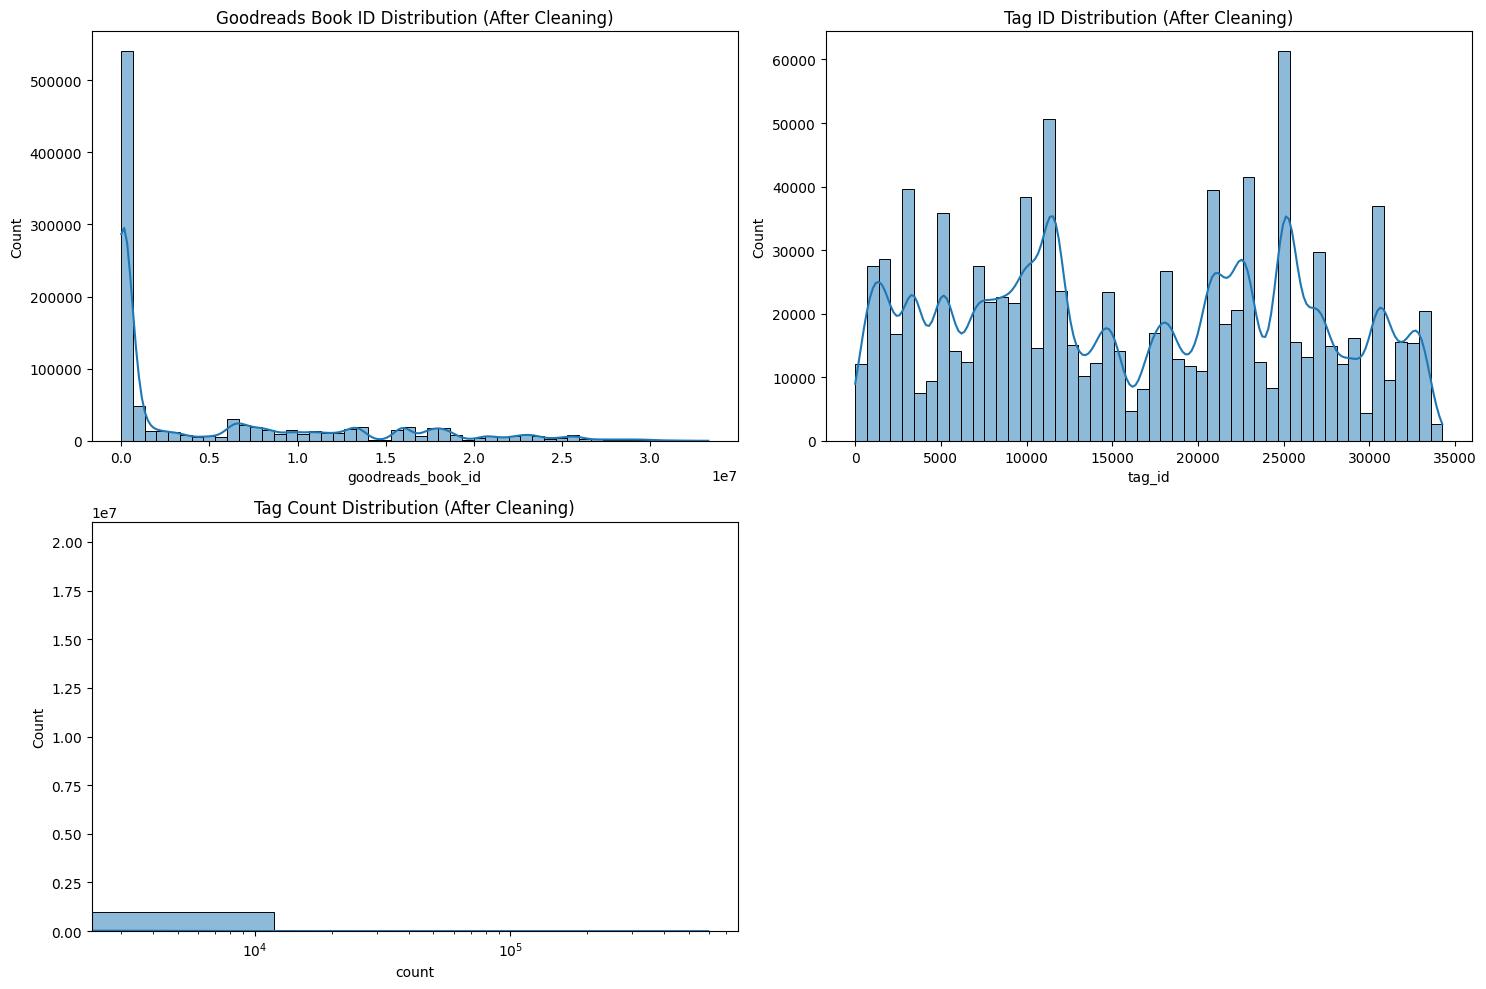


Final Validation:
Missing values: 0
Duplicate book-tag pairs: 0
Unique books: 10000
Unique tags: 34252
Rows remaining: 999904
Average tags per book: 99.9904
Cleaned data saved to 'book_tags_cleaned.csv'


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
book_tags = pd.read_csv(r"C:/Users/HP/OneDrive\Desktop\BookMatchML\data\book_tags.csv")
books = pd.read_csv(r"C:/Users/HP/OneDrive\Desktop\BookMatchML\data\books_cleaned_final.csv")

# Function to analyze data
def analyze_data(df, stage="Before Cleaning"):
    print(f"\n--- {stage} ---")
    print("Data Info:")
    print(df.info())
    print("\nNumeric Summary:")
    print(df.describe())
    print("\nCategorical Summary:")
    if any(df.dtypes == 'object'):
        print(df.describe(include='object'))
    else:
        print("No categorical columns present.")

    # Plots
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 2, 1)
    sns.histplot(df['goodreads_book_id'].dropna(), bins=50, kde=True)
    plt.title(f'Goodreads Book ID Distribution ({stage})')
    plt.subplot(2, 2, 2)
    sns.histplot(df['tag_id'].dropna(), bins=50, kde=True)
    plt.title(f'Tag ID Distribution ({stage})')
    plt.subplot(2, 2, 3)
    sns.histplot(df['count'].dropna(), bins=50, kde=True)
    plt.title(f'Tag Count Distribution ({stage})')
    plt.xscale('log')
    plt.tight_layout()
    plt.show()

# Before Cleaning Analysis
analyze_data(book_tags, "Before Cleaning")

# Additional Checks
print("\nAdditional Checks (Before):")
print("Missing values per column:")
print(book_tags.isnull().sum())
print("Duplicate rows:", book_tags.duplicated().sum())
print("Duplicate book-tag pairs:", book_tags.duplicated(subset=['goodreads_book_id', 'tag_id']).sum())
print("Unique books:", book_tags['goodreads_book_id'].nunique())
print("Unique tags:", book_tags['tag_id'].nunique())

# Preprocessing
book_tags_cleaned = book_tags.copy()

# 1. Handle duplicates
duplicate_pairs = book_tags_cleaned.duplicated(subset=['goodreads_book_id', 'tag_id'], keep=False)
if duplicate_pairs.sum() > 0:
    print(f"Found {duplicate_pairs.sum()} duplicate book-tag pairs.")
    book_tags_cleaned = book_tags_cleaned.groupby(['goodreads_book_id', 'tag_id'], as_index=False).agg({'count': 'sum'})
    print("Duplicates aggregated by summing counts.")
book_tags_cleaned = book_tags_cleaned.drop_duplicates()

# 2. Fix negative counts
invalid_counts = book_tags_cleaned['count'] < 0
if invalid_counts.sum() > 0:
    print(f"Found {invalid_counts.sum()} rows with negative counts.")
    book_tags_cleaned.loc[invalid_counts, 'count'] = 0
    print("Negative counts replaced with 0.")

# 3. Validate goodreads_book_id
valid_book_ids = set(books['book_id'])
invalid_book_ids = book_tags_cleaned[~book_tags_cleaned['goodreads_book_id'].isin(valid_book_ids)]['goodreads_book_id'].unique()
if len(invalid_book_ids) > 0:
    print(f"Found {len(invalid_book_ids)} invalid goodreads_book_ids:", sorted(invalid_book_ids)[:10])
    book_tags_cleaned = book_tags_cleaned[book_tags_cleaned['goodreads_book_id'].isin(valid_book_ids)]
    print("Removed tags with invalid goodreads_book_ids.")
else:
    print("All goodreads_book_ids match books.csv.")

# After Cleaning Analysis
analyze_data(book_tags_cleaned, "After Cleaning")

# Final Validation
print("\nFinal Validation:")
print("Missing values:", book_tags_cleaned.isnull().sum().sum())
print("Duplicate book-tag pairs:", book_tags_cleaned.duplicated(subset=['goodreads_book_id', 'tag_id']).sum())
print("Unique books:", book_tags_cleaned['goodreads_book_id'].nunique())
print("Unique tags:", book_tags_cleaned['tag_id'].nunique())
print("Rows remaining:", len(book_tags_cleaned))
print("Average tags per book:", book_tags_cleaned.groupby('goodreads_book_id')['tag_id'].count().mean())

# Save cleaned data
book_tags_cleaned.to_csv(r"C:/Users/HP/OneDrive\Desktop\BookMatchML\data\book_tags_cleaned.csv", index=False)
print("Cleaned data saved to 'book_tags_cleaned.csv'")